In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D  
import IPython.display as IPdisplay
import imageio

In [2]:
data1 = pd.read_csv("dataset2016-2018.csv")
data1.head(10)

,order_id,bin,payment_type,billing_city,billing_postal_code,retry_indicator,traffic_provider,M0_Approval%
0,9426995,408537,Visa,HAMPTON,3842,0,N\A,1.000000
1,11614239,412739,Visa,KATY,77494,0,MobileSite-PD-TextLink-SeeExactAddress,1.000000
2,11614242,379743,American Express,MADISON,39110,0,22,1.000000
3,11614257,400344,Visa,LIVE OAK,32060,0,PropContact,1.000000
4,11614281,517760,MasterCard,POMPANO BEACH,33065,0,N\A,0.000000
5,11614283,473703,Visa,NORFOLK,23503,0,trulia foreclosures,1.000000
6,11614289,437307,Visa,KANSAS CITY,66106,0,MobileSite-PD-TextLink-SeeExactAddress,0.333333
7,11614312,416993,Visa,ROYSTON,30662,0,N\A,0.000000
8,11614316,441244,Visa,HEADLAND,36345,0,HeaderMenuJoin,1.000000
9,11614349,430326,Visa,WHARNCLIFFE,25651,0,Mobile_Banner,0.000000


In [3]:
# bin_count = data1.groupby('bin')['bin'].nunique()
# bin_count
bin_count = data1['bin'].value_counts()
bin_count = pd.DataFrame({'bin':bin_count.index, 'count':bin_count.values})
bin_count.head(10).style.hide_index()

bin,count
517805,6013
533248,3254
473702,3193
601100,2096
434256,1992
426684,1800
444796,1759
473703,1667
403995,1643
400022,1560


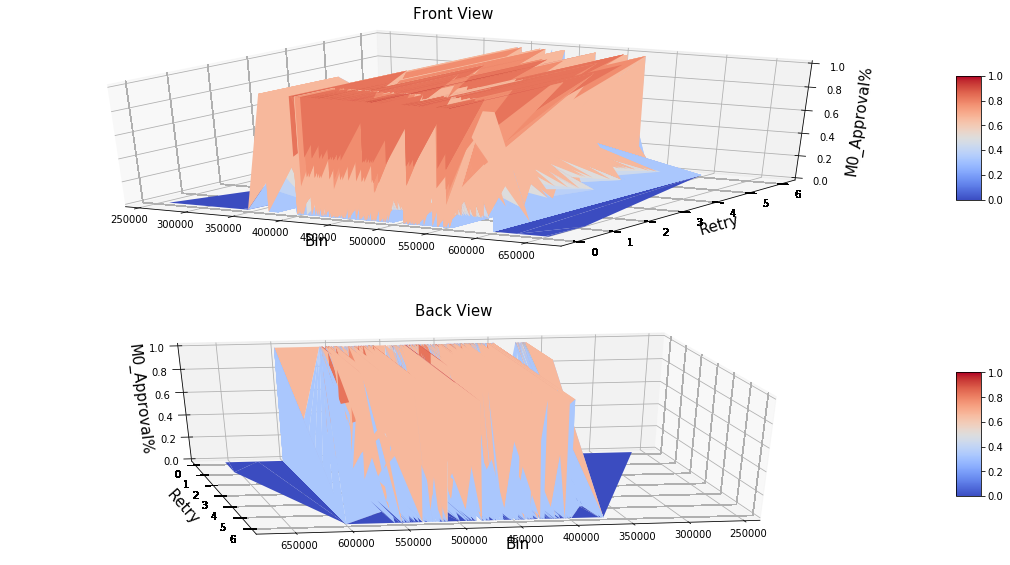

In [4]:
fig = plt.figure(figsize=[20,10])

ax = fig.add_subplot(2,1,1, projection='3d')

yticks = data1['retry_indicator']

surf = ax.plot_trisurf(data1['bin'], data1['retry_indicator'],data1['M0_Approval%'] , 
                       cmap=cm.coolwarm, linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)

labelsize=15
ax.set_xlabel('Bin', fontsize=labelsize)
ax.set_ylabel('Retry', fontsize=labelsize)
ax.set_zlabel('M0_Approval%', fontsize=labelsize)
ax.set_title('Front View', fontsize=15, x=0.5, y=1.04)

ax.set_yticks( yticks )
ax.tick_params(axis='both', labelsize=10 )


ax = fig.add_subplot(2,1,2, projection='3d')

yticks = data1['retry_indicator']

surf = ax.plot_trisurf(data1['bin'], data1['retry_indicator'],data1['M0_Approval%'] , 
                       cmap=cm.coolwarm, linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)

labelsize=15
ax.set_xlabel('Bin', fontsize=labelsize)
ax.set_ylabel('Retry', fontsize=labelsize)
ax.set_zlabel('M0_Approval%', fontsize=labelsize)
ax.set_title('Back View', fontsize=15, x=0.5, y=1.04)

ax.set_yticks( yticks )
ax.tick_params(axis='both', labelsize=10 )


ax.view_init(30, 80)
plt.show()

In [5]:
fig = plt.figure(figsize=[15,10])

yticks = data1['retry_indicator']

ax =fig.add_subplot(111, projection='3d')

surf = ax.plot_trisurf(data1['bin'], data1['retry_indicator'],data1['M0_Approval%'] , 
                       cmap=cm.coolwarm, linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)

labelsize=15
ax.set_xlabel('Bin', fontsize=labelsize)
ax.set_ylabel('Retry', fontsize=labelsize)
ax.set_zlabel('M0_Approval%', fontsize=labelsize)
ax.set_title('Bin - Retry - Approval', fontsize=15, x=0.5, y=1.04)

ax.set_yticks( yticks )
ax.tick_params(axis='both', labelsize=10 )

gif_filename='Bin_Retry_Approval'

filenames=[]

#Rotating
for n in range(-120, 120, 2):
    ax.view_init(30, n)
    plt.savefig('images/' + gif_filename + '/img' + str(n).zfill(3) + '.png',
                bbox_inches='tight')
    filenames.append('images/' + gif_filename + '/img' + str(n).zfill(3) + '.png')

plt.close()


file_path_name =  gif_filename + '.gif'

#Make .gif
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave(file_path_name , images)

#Display .gif
IPdisplay.Image(url=file_path_name)

In [ ]:
# test = data1.groupby(['order_id', 'bin']).size()
# [item[1] for item in test.index]

# if 517805 in [item[1] for item in test.index]:
#     print('True')

In [ ]:
# bin_count['count'].shape
# data1['bin'].shape